In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# module 6.1.4 Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


605

In [6]:
# module 6.2.6 Importing additional dependencies
import requests
from config import weather_api_key

#Import the time libraries and the datetime module from the datetiem library.
import time
from datetime import datetime


In [7]:
# module 6.2.6 Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# module 6.2.6 Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ducheng
Processing Record 2 of Set 1 | tsumeb
Processing Record 3 of Set 1 | tautira
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | yar-sale
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | wanning
Processing Record 9 of Set 1 | pamyat parizhskoy kommuny
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | itoman
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | waitati
Processing Record 16 of Set 1 | klyuchevskiy
Processing Record 17 of Set 1 | chuy
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | celestun
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | nouadhibou
Processing Record 23 of Set 1 |

Processing Record 35 of Set 4 | ixtapa
Processing Record 36 of Set 4 | westport
Processing Record 37 of Set 4 | vao
Processing Record 38 of Set 4 | okha
Processing Record 39 of Set 4 | kaili
Processing Record 40 of Set 4 | haines junction
Processing Record 41 of Set 4 | itarema
Processing Record 42 of Set 4 | burley
Processing Record 43 of Set 4 | isla vista
Processing Record 44 of Set 4 | borba
Processing Record 45 of Set 4 | soyo
Processing Record 46 of Set 4 | mahebourg
Processing Record 47 of Set 4 | rungata
City not found. Skipping...
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | manaure
Processing Record 50 of Set 4 | gobindapur
Processing Record 1 of Set 5 | skoghall
Processing Record 2 of Set 5 | boda
Processing Record 3 of Set 5 | palu
Processing Record 4 of Set 5 | urumqi
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | vardo
Processing Record 7 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 8

Processing Record 28 of Set 8 | lasa
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | hounde
Processing Record 31 of Set 8 | ulaanbaatar
Processing Record 32 of Set 8 | norman wells
Processing Record 33 of Set 8 | raudeberg
Processing Record 34 of Set 8 | hirara
Processing Record 35 of Set 8 | sokolka
Processing Record 36 of Set 8 | sioux lookout
Processing Record 37 of Set 8 | bolshegrivskoye
City not found. Skipping...
Processing Record 38 of Set 8 | solnechnyy
Processing Record 39 of Set 8 | margate
Processing Record 40 of Set 8 | biak
Processing Record 41 of Set 8 | saint anthony
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | karema
Processing Record 44 of Set 8 | uk
City not found. Skipping...
Processing Record 45 of Set 8 | gazni
City not found. Skipping...
Processing Record 46 of Set 8 | gandajika
Processing Record 47 of Set 8 | tiksi
Processing Record 48 of Set 8 | lodi
Processing Record 49 of Set 8 | la rioja
Processing Record 50 o

Processing Record 14 of Set 12 | tarauaca
Processing Record 15 of Set 12 | aldan
Processing Record 16 of Set 12 | cap malheureux
Processing Record 17 of Set 12 | ampanihy
Processing Record 18 of Set 12 | chagoda
Processing Record 19 of Set 12 | maceio
Processing Record 20 of Set 12 | santa rosa
Processing Record 21 of Set 12 | talaya
Processing Record 22 of Set 12 | san quintin
Processing Record 23 of Set 12 | qasigiannguit
Processing Record 24 of Set 12 | bagotville
Processing Record 25 of Set 12 | prieska
Processing Record 26 of Set 12 | taranagar
Processing Record 27 of Set 12 | zuwarah
Processing Record 28 of Set 12 | port blair
Processing Record 29 of Set 12 | guarapari
Processing Record 30 of Set 12 | kundiawa
Processing Record 31 of Set 12 | poum
Processing Record 32 of Set 12 | sambava
Processing Record 33 of Set 12 | nyanguge
Processing Record 34 of Set 12 | ponta delgada
Processing Record 35 of Set 12 | lida
Processing Record 36 of Set 12 | areado
Processing Record 37 of Set 

In [9]:
# module 6.2.4 Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ducheng,23.2373,111.5317,83.71,63,96,7.49,CN,2022-04-22 04:33:48
1,Tsumeb,-19.2333,17.7167,56.55,60,0,7.81,NA,2022-04-22 04:32:48
2,Tautira,-17.7333,-149.1500,79.34,76,86,22.86,PF,2022-04-22 04:33:49
3,Hithadhoo,-0.6000,73.0833,84.94,66,15,9.31,MV,2022-04-22 04:32:20
4,Yar-Sale,66.8333,70.8333,6.96,90,100,17.63,RU,2022-04-22 04:33:15
5,Bredasdorp,-34.5322,20.0403,60.48,76,97,9.57,ZA,2022-04-22 04:33:49
6,Bluff,-46.6000,168.3333,48.79,76,100,24.61,NZ,2022-04-22 04:33:50
7,Wanning,18.8003,110.3967,85.06,69,20,10.89,CN,2022-04-22 04:33:50
8,Pamyat Parizhskoy Kommuny,56.1048,44.4952,44.55,73,13,7.78,RU,2022-04-22 04:33:51
9,Mataura,-46.1927,168.8643,48.47,90,99,8.68,NZ,2022-04-22 04:31:22


In [10]:
# Reorder the columns into a new DataFrame column order.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df[new_column_order].head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ducheng,CN,2022-04-22 04:33:48,23.2373,111.5317,83.71,63,96,7.49
1,Tsumeb,NA,2022-04-22 04:32:48,-19.2333,17.7167,56.55,60,0,7.81
2,Tautira,PF,2022-04-22 04:33:49,-17.7333,-149.1500,79.34,76,86,22.86
3,Hithadhoo,MV,2022-04-22 04:32:20,-0.6000,73.0833,84.94,66,15,9.31
4,Yar-Sale,RU,2022-04-22 04:33:15,66.8333,70.8333,6.96,90,100,17.63
5,Bredasdorp,ZA,2022-04-22 04:33:49,-34.5322,20.0403,60.48,76,97,9.57
6,Bluff,NZ,2022-04-22 04:33:50,-46.6000,168.3333,48.79,76,100,24.61
7,Wanning,CN,2022-04-22 04:33:50,18.8003,110.3967,85.06,69,20,10.89
8,Pamyat Parizhskoy Kommuny,RU,2022-04-22 04:33:51,56.1048,44.4952,44.55,73,13,7.78
9,Mataura,NZ,2022-04-22 04:31:22,-46.1927,168.8643,48.47,90,99,8.68


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today


1650603207.547139

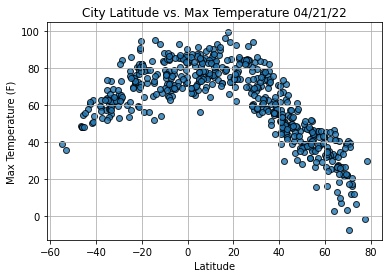

In [14]:
# module 6.3.1 Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


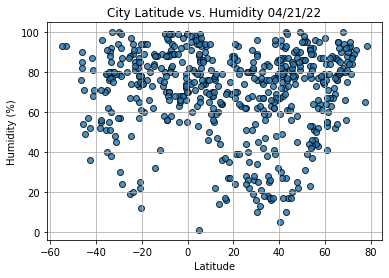

In [15]:
# module 6.3.2 Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


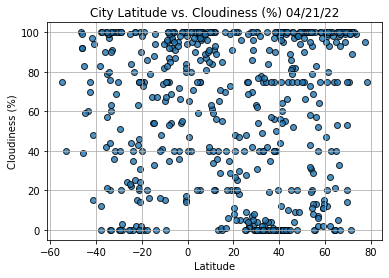

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# module 6.3.3 Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


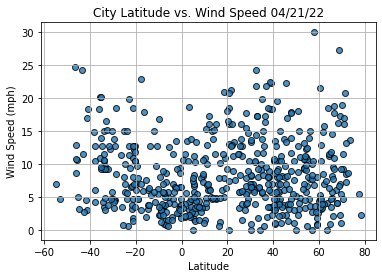

In [17]:
# module 6.3.4 Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()


In [18]:
# module 6.4.2 Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [19]:
# module 6.4.2 Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [21]:
# module 6.4.2 DataFrame of all latitudes before filtering
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ducheng,23.2373,111.5317,83.71,63,96,7.49,CN,2022-04-22 04:33:48
4,Yar-Sale,66.8333,70.8333,6.96,90,100,17.63,RU,2022-04-22 04:33:15
7,Wanning,18.8003,110.3967,85.06,69,20,10.89,CN,2022-04-22 04:33:50
8,Pamyat Parizhskoy Kommuny,56.1048,44.4952,44.55,73,13,7.78,RU,2022-04-22 04:33:51
12,Itoman,26.1247,127.6694,84.97,80,75,16.11,JP,2022-04-22 04:33:54


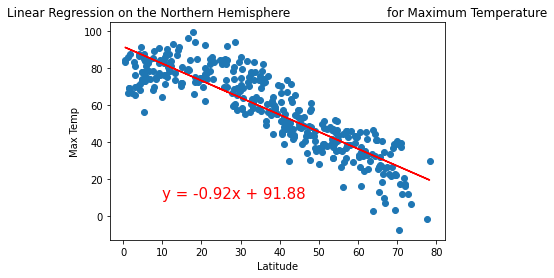

<Figure size 432x288 with 0 Axes>

In [40]:
# module 6.4.2 Linear regression on the Northern Hemisphere for max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,10))

plt.show()


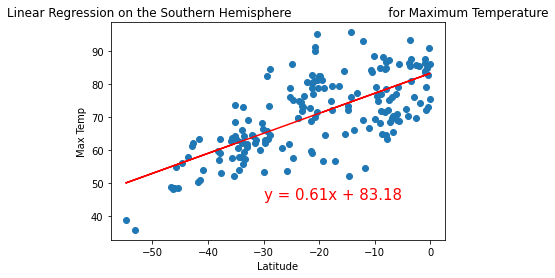

<Figure size 432x288 with 0 Axes>

In [33]:
# module 6.4.2 Linear regression on the Southern Hemisphere for max temp
# HINT: the code in the module has an extra "n" which probably does not belong.
# HINT: compare it to the code in the Norther Hemisphere scatter plot chart above.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,45))
plt.show()


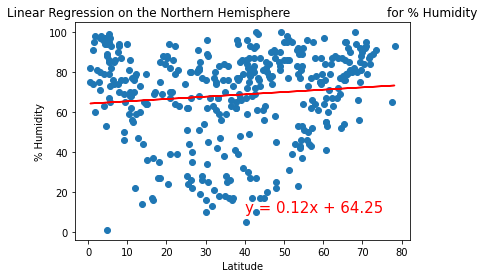

<Figure size 432x288 with 0 Axes>

In [34]:
# module 6.4.3 Linear regression on the Northern Hemisphere for % humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
plt.show()


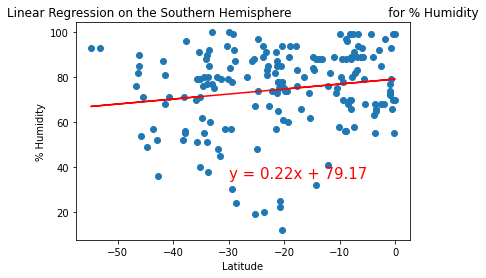

<Figure size 432x288 with 0 Axes>

In [35]:
# module 6.4.3 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-30,35))
plt.show()


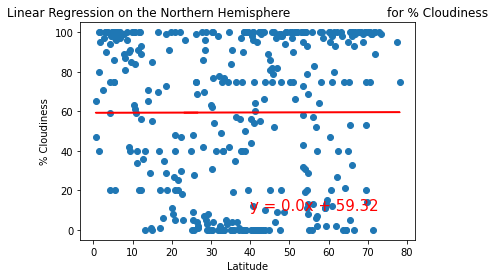

<Figure size 432x288 with 0 Axes>

In [36]:
# module 6.4.4 SKILL DRILL
# linear regression on the Southern Hemisphere for cloudiness.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))
plt.show()


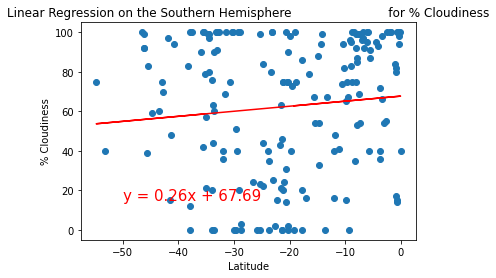

<Figure size 432x288 with 0 Axes>

In [37]:
# module 6.4.4 SKILL DRILL
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))
plt.show()


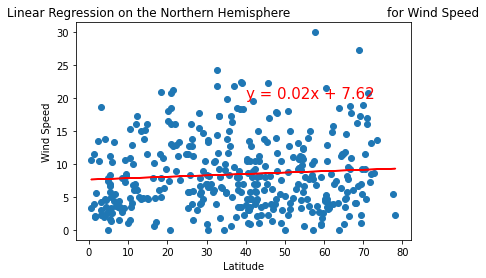

<Figure size 432x288 with 0 Axes>

In [38]:
# module 6.4.5 Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,20))
plt.show()


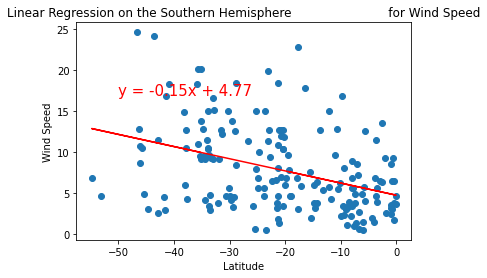

<Figure size 432x288 with 0 Axes>

In [39]:
# module 6.4.5 Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,17))
plt.show()
